# load DEG data and visualize it. (an exmple)

In [22]:
#library(magrittr)
library(clusterProfiler)

In [24]:
resdata=readRDS("data/data2_resdata.rds")

In [47]:
de_up=resdata[resdata$log2FoldChange>0,]
de_dn=resdata[resdata$log2FoldChange<0,]

In [49]:
de_up$Gene

[1] "Gm15441"            "Apoa4"              "Gstt2"             
   [4] "Igfbp2"             "Lamb3"              "Tmem86a"           
   [7] "Cgref1"             "Fam195a"            "Acot1"             
  [10] "Tmem120a"           "Ldha"               "Ak2"               
  [13] "Hsd17b10"           "BC023320"           "G0s2"              
  [16] "Krt23"              "Suclg1"             "Fgf21"             
  [19] "Psmd9"              "Sult5a1"            "Lhpp"              
  [22] "2010003K11Rik"      "Psmd4"              "Pnldc1"            
  [25] "Golt1a"             "Gpc1"               "Bcl2l14"           
  [28] "Egfl7"              "Tspan31"            "Rad51l1"           
  [31] "Cyp4a31"            "Mgll"               "Brms1"             
  [34] "Etfb"               "Ly6d"               "Bdh1"              
  [37] "Chkb"               "Tst"                "Mettl7b"           
  [40] "Tor1a"              "Ehhadh"             "Eci1"              
  [43] "Tmem134"            "Ppp2r2d"            "Unc119"            
  [46] "Hadhb"              "Pctp"               "Id1"               
  [49] "Rbp4"               "Acot2"              "Fuom"              
  [52] "Cisd3"              "Tlr12"              "Ccs"               
  [55] "Psmb5"              "Dhrs1"              "Fabp1"             
  [58] "Sod1"               "AK216824"           "Cntnap1"           
  [61] "Acaa1b"             "Blvrb"              "Spp1"              
  [64] "Eif3k"              "Tnfaip8l1"          "Acaa1a"            
  [67] "Slc25a33"           "Cyp8b1"             "Apoa1"             
  [70] "Timm17b"            "Ppp1r3g"            "Eif4ebp3"          
  [73] "Chchd10"            "Phyh"               "Fabp5"             
  [76] "Phb"                "Plk3"               "Slc25a47"          
  [79] "Ndufb7"             "AK217614"           "Vamp8"             
  [82] "Psmd13"             "4931408D14Rik"      "Acot8"             
  [85] "Aprt"               "Rpl37"              "Agap2"             
  [88] "Hsd17b6"            "Ddt"                "0610005C13Rik"     
  [91] "Grcc10"             "Ftl1"               "Tubb4b"            
  [94] "Pycrl"              "Cyp4a10"            "Psmb3"             
  [97] "Pnpla7"             "Arsg"               "AK190465"          
 [100] "Ech1"               "Fitm1"              "Cd207"             
 [103] "Rpl14"              "Hmgcl"              "Rpl18a"            
 [106] "Psmc4"              "Mrpl12"             "Pgm3"              
 [109] "Apoa5"              "AK159995"           "Txnip"             
 [112] "Acadm"              "Mrpl15"             "Psmb4"             
 [115] "Agmat"              "Mrpl17"             "Psmb1"             
 [118] "Fcgrt"              "Clec2d"             "Slc22a1"           
 [121] "Ctss"               "AK219583"           "Mlycd"             
 [124] "Urm1"               "Cyba"               "AF251705"          
 [127] "2310039H08Rik"      "Rplp2"              "Galk1"             
 [130] "Mosc2"              "AK199258"           "Rpl36a"            
 [133] "Mpdu1"              "Rplp0"              "Atp5g2"            
 [136] "Pex16"              "Psmb6"              "Decr1"             
 [139] "Edf1"               "Aldoa"              "Prdx5"             
 [142] "H2-Ab1"             "Trem2"              "Ubxn6"             
 [145] "Nlrp12"             "Cyb5"               "Psmc3"             
 [148] "Dynlt1b"            "Phb2"               "C1qb"              
 [151] "Hint1"              "St3gal3"            "Rpl13"             
 [154] "Cyp2a4"             "Rpl18"              "Ndufs8"            
 [157] "Isoc2b"             "Hmbs"               "Csrp2"             
 [160] "AK192544"           "Hsd17b11"           "Aldh3a2"           
 [163] "Eef1g"              "Fabp2"              "Acot3"             
 [166] "Pemt"               "Mosc1"              "Slc25a20"          
 [169] "Ccdc85b"            "Bnip3"              "Ppcs"              
 [172] "Cdc34

# converting IDs between types

In [53]:
library(org.Mm.eg.db)

In [61]:
#?bitr

In [59]:
deid=bitr(de_up$Gene,fromType="SYMBOL",toType=c("ENTREZID","ENSEMBL"),OrgDb=org.Mm.eg.db)


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(de_up$Gene, fromType = "SYMBOL", toType = c("ENTREZID", :
“14.73% of input gene IDs are fail to map...”


In [63]:
deid[1:5,]

,SYMBOL,ENTREZID,ENSEMBL
,<chr>,<chr>,<chr>
1,Gm15441,100038464,ENSMUSG00000074398
2,Apoa4,11808,ENSMUSG00000032080
3,Gstt2,14872,ENSMUSG00000033318
4,Igfbp2,16008,ENSMUSG00000039323
5,Lamb3,16780,ENSMUSG00000026639


In [65]:
deg=deid[,2]

In [68]:
#deg

In [69]:
?enrich_KEGG

No documentation for ‘enrich_KEGG’ in specified packages and libraries:
you could try ‘??enrich_KEGG’

In [70]:

enrich_KEGG=enrichKEGG(gene=deg,organism='mouse',pvalueCutoff=0.05)

Reading KEGG annotation online:


Reading KEGG annotation online:




In [75]:
#enrich_KEGG
enrich_KEGG=setReadable(enrich_KEGG, 'org.Mm.eg.db', keyType="ENTREZID")
head(enrich_KEGG)


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
mmu03010,mmu03010,Ribosome,127/2754,179/8924,9.339534e-29,3.035349e-26,2.133346e-26,Rpl37/Rpl14/Rpl18a/Mrpl12/Mrpl15/Mrpl17/Rplp2/Rpl36a/Rplp0/Rpl13/Rpl18/Rps15/Rpsa/Rps29/Rps2/Uba52/Rpl11/Rps26/Rpl28/Rpl37a/Mrps18a/Rps4x/Rps23/Rpl29/Rpl23a/Rpl8/Rpl27a/Rpl19/Rps17/Mrps21/Mrpl11/Rpl7a/Mrpl28/Rpl21/Mrpl20/Rpl15/Rps5/Mrps12/Rps28/Rpl24/Rpl38/Rps16/Rplp1/Rpl7/Rpl27/Mrpl23/Mrps7/Rpl6/Fau/Mrps15/Rps6/Mrpl27/Rpl31/Mrps10/Mrpl18/Rps8/Rps9/Mrps17/Mrpl24/Rps27/Rpl23/Rps20/Rps10/Rps14/Rps21/Mrpl16/Rpl10a/Mrpl9/Mrpl36/Rpl36al/Rpl36/Rpl32/Mrpl10/Mrpl21/Rps11/Mrps18c/Rpl30/Mrps16/Mrpl34/Mrpl2/Mrps9/Rpl26/Rpl3/Rps18/Rps13/Mrps14/Rpl35a/Mrpl13/Rps19/Rps7/Mrpl30/Rpl22/Mrpl14/Mrps11/Mrps6/Mrpl33/Rpl39/Rpl35/Rpl4/Rpl10/Rps3/Mrpl32/Rsl24d1/Rpl12/Mrpl22/Rps27a/Mrps5/Rps15a/Mrpl4/Mrpl35/Rpl34-ps1/Rpl9/Mrpl3/Rpl34/Mrpl19/Rpl13a/Rpl3l/Rpl22l1/Mrpl1/Rps12/Rps25/Rpl5/Mrps2/Rps24/Rps27l/Rpl41/Rpl17,127
mmu05012,mmu05012,Parkinson disease,157/2754,247/8924,7.113527e-27,1.155948e-24,8.124397e-25,Psmd9/Psmd4/Psmb5/Ndufb7/Psmd13/Tubb4b/Psmb3/Psmc4/Psmb4/Psmb1/Atp5g2/Psmb6/Psmc3/Ndufs8/Ndufb10/Ndufs7/Txn2/Uba52/Cox6a1/Cyc1/Psma7/Sdhb/Psma1/Sdhd/Psmd8/Ndufs5/Ndufa5/Ndufb11/Atp5o/Ndufa2/Atp5d/Atp5h/Ndufab1/Psmb7/Ndufs3/Ndufb5/Ubb/Uqcr11/Atp5c1/Uqcrb/Ndufc1/Ndufa13/Atf4/Cox7a2l/Uqcrc1/Cox7c/Ube2l6/Cox5b/Ndufa11/Psmd7/Atp5g1/Cox6b1/Park7/Psmc2/Cox5a/Psmc5/Uqcrfs1/Ndufv2/Psma2/Cox6c/Ndufa6/Psmb2/Tuba8/Ndufs2/Tuba1b/Psma6/Ndufa12/Cox4i1/Ndufs6/Cycs/Psma5/Psmc1/Sdhc/Ndufb3/Ndufa8/Atp5g3/Txn1/Psmd12/Ndufa3/Uqcrq/Atp5b/Slc25a5/Ndufa9/Uqcr10/Cox7a2/Uqcrh/Ppif/Psmd3/Ndufb9/Cox8a/Htra2/Psma4/Ndufb8/Psmd6/Ndufc2/Atp5j/Tuba4a/Ndufa1/Ndufv1/Tuba1a/Tuba1c/Adrm1/Bax/Ndufv3/Ube2j2/Cox6b2/Psmd14/Tubb5/Gnas/Gnai2/Vdac2/Rps27a/Gnal/Ndufs4/Ndufb2/Psma3/Ndufa10/Calm2/Klc4/Ndufa4/Tubb2a/Vdac3/Cox8b/Uqcrc2/Calml4/Cox7b/Ndufa7/Cox7a1/Pink1/Psmc6/Psmd2/Ndufb4/Ube2l3/Ubc/Bcl2l1/Adora2a/Calm3/Vdac1/Trp53/Eif2s1/Ube2g2/Ndufa4l2/Tubb6/Atp5a1/Mapt/Ndufb6/Ddit3/Slc18a2/Atp5e/Klc1/Calm1/Snca/Daxx/Psmd1/Psma8/Slc18a1/Sncaip,157
mmu05020,mmu05020,Prion disease,164/2754,268/8924,2.459228e-25,2.325649e-23,1.634545e-23,Psmd9/Psmd4/Psmb5/Sod1/Ndufb7/Psmd13/Tubb4b/Psmb3/Psmc4/Psmb4/Psmb1/Cyba/Atp5g2/Psmb6/Psmc3/C1qb/Ndufs8/Ndufb10/Ndufs7/C1qa/Cox6a1/Cyc1/Psma7/Sdhb/Psma1/Sdhd/Psmd8/Ndufs5/Ndufa5/Ndufb11/Atp5o/Ndufa2/Atp5d/Atp5h/Ndufab1/Psmb7/Ndufs3/Ndufb5/Uqcr11/Atp5c1/Uqcrb/Creb3l3/Ndufc1/Ndufa13/Atf4/Cox7a2l/Uqcrc1/Cox7c/Cox5b/Ndufa11/C1qc/Psmd7/Creb3/Atp5g1/Cox6b1/Psmc2/Cox5a/Psmc5/Uqcrfs1/Ndufv2/Psma2/C8g/Cox6c/Ndufa6/Psmb2/Tuba8/Ndufs2/Tuba1b/Psma6/Ndufa12/Cox4i1/Ndufs6/Cycs/Psma5/Psmc1/Sdhc/Ndufb3/Ndufa8/Atp5g3/Psmd12/Ndufa3/Uqcrq/Atp5b/Slc25a5/Ndufa9/Uqcr10/Cox7a2/Uqcrh/Ppif/Psmd3/Ndufb9/Cox8a/Psma4/Ndufb8/Ncf2/Psmd6/Ndufc2/Atp5j/Tuba4a/Ndufa1/Ndufv1/Tuba1a/Tuba1c/Adrm1/Bax/Bad/Ndufv3/Mapk12/Mapk3/Cox6b2/Ncf4/Psmd14/Tubb5/Csnk2b/Vdac2/Ndufs4/Ndufb2/Psma3/Ndufa10/Klc4/Ndufa4/Tubb2a/Vdac3/Ccl5/Cox8b/Uqcrc2/Cox7b/Ndufa7/Stip1/Ncf1/Cox7a1/Mapk11/Psmc6/Psmd2/Rac2/Il1b/Fyn/Hspa1l/Ndufb4/Vdac1/Cacna1d/Eif2s1/Ndufa4l2/Tnf/Tubb6/Atp5a1/Il1a/Grin3b/Ndufb6/Cav2/Atf6b/Ddit3/Atp5e/Hspa8/Casp12/Pik3cd/Klc1/Rac1/Psmd1/Prkcd/Psma8/Prnp/Ppp3cc/Cav1,164
mmu00190,mmu00190,Oxidative phosphorylation,100/2754,135/8924,2.862337e-25,2.325649e-23,1.634545e-23,Lhpp/Ndufb7/Atp5g2/Ndufs8/Ndufb10/Ndufs7/Cox6a1/Cyc1/Sdhb/Atp6v1f/Sdhd/Ndufs5/Ndufa5/Ndufb11/Atp5o/Ndufa2/Atp5d/Atp5h/Ndufab1/Ndufs3/Ndufb5/Uqcr11/Atp5c1/Uqcrb/Ndufc1/Ndufa13/Cox7a2l/Cox17/Uqcrc1/Cox7c/Cox5b/Ndufa11/Atp5g1/Cox6b1/Atp5k/Cox5a/Atp6v1e1/Uqcrfs1/Ndufv2/Atp6v0b/Cox6c/Ndufa6/Ndufs2/Ndufa12/Ppa1/Cox4i1/Ndufs6/Ppa2/Cycs/Atp6v0d1/Sdhc/Ndufb3/Ndufa8/Atp5g3/Atp6v0e/Atp5j2/Ndufa3/Uqcrq/Atp5b/Ndufa9/Uqcr10/Cox7a2/Atp6v0c/Uqcrh/Atp6v1g1/Ndufb9/Cox8a/Atp5l/Ndufb8/Ndufc2/Atp5j/Ndufa1/Ndufv1/Atp6v1b2/Ndufv3/Cox6b2/Atp6v1d/Atp6v0e2/Ndufs4/Ndufb2/Ndufa10/Ndufa4/Atp6v1c1/Cox8b/Uqcrc2/Tcirg1/Cox7b/Ndufa7/Cox7a1/Ndufb4/Cox11/Atp6v1h/Ndufa4l2/A

Warning message:
“ggrepel: 335 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


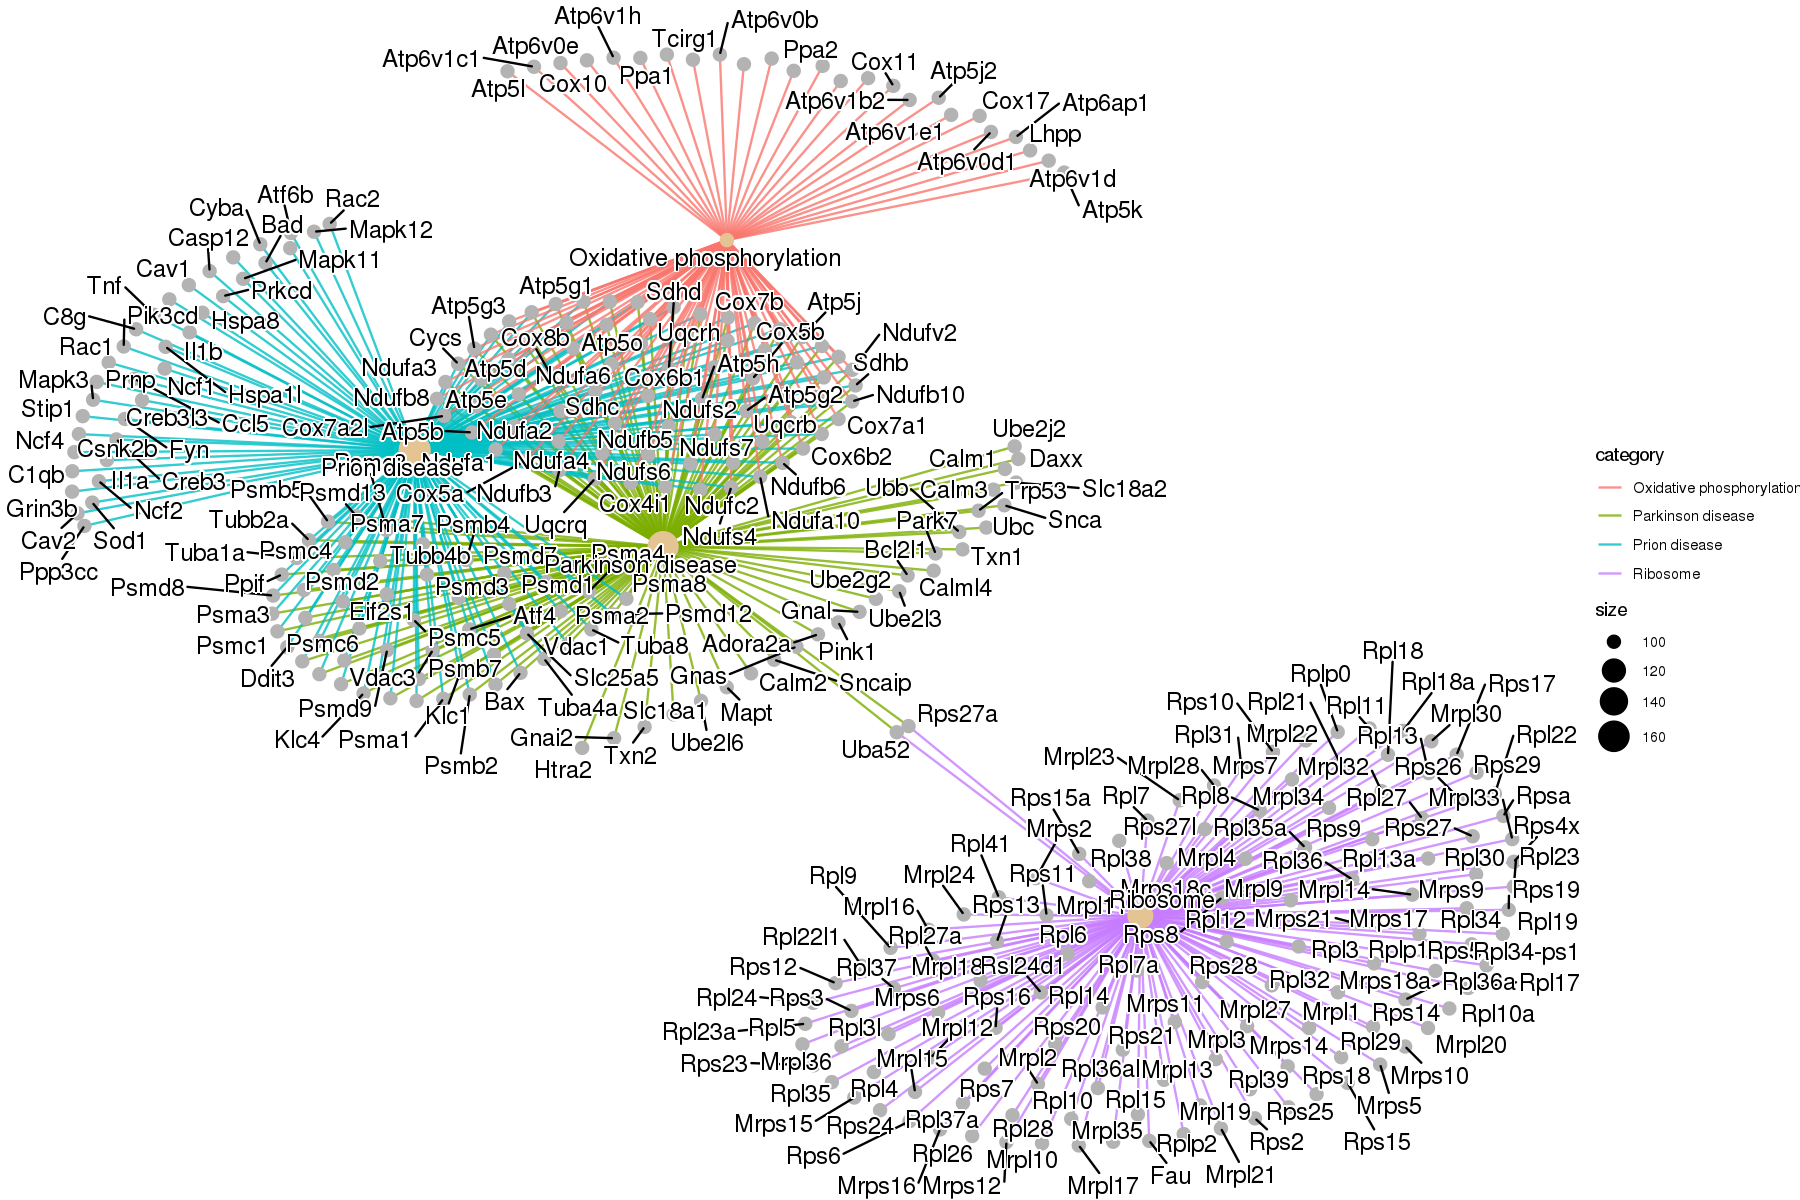

In [78]:
options(repr.plot.width=15, repr.plot.height=10) 
cnetplot(enrich_KEGG,  showCategory = 4,colorEdge=TRUE,node_label="all")

**clusterProfiler can be used to find enrichment across different databases**
(code not complete) <br>
collection of databases on msigdb: https://www.gsea-msigdb.org/gsea/msigdb/

In [64]:
#     fc=de2gse[[2]]
#     de=de2gse[[3]]
#     deid=bitr(rownames(de),fromType="SYMBOL",toType=c("ENTREZID"),OrgDb=org.Hs.eg.db)
#     deg=deid[,2]

# #     head(fc)
# #     head(deg)
#     #' 
#     ## -----------------------------------------------------------------------------
#     xid=bitr(names(fc),fromType="SYMBOL",toType=c("ENTREZID"),OrgDb=org.Hs.eg.db)
#     names(fc)=xid[,2]

In [62]:
# FuncAnn=function(de2gse){ 
#     #de2gse=readRDS(de_file)
#     #de_file
#     library(clusterProfiler)
#     library(DOSE)
#     library(msigdbr)
#     library(enrichplot)
#     library(org.Hs.eg.db)

#     #' 
#     ## -----------------------------------------------------------------------------
    
#     fc=de2gse[[2]]
#     de=de2gse[[3]]
#     deid=bitr(rownames(de),fromType="SYMBOL",toType=c("ENTREZID"),OrgDb=org.Hs.eg.db)
#     deg=deid[,2]

# #     head(fc)
# #     head(deg)
#     #' 
#     ## -----------------------------------------------------------------------------
#     xid=bitr(names(fc),fromType="SYMBOL",toType=c("ENTREZID"),OrgDb=org.Hs.eg.db)
#     names(fc)=xid[,2]
# #     fc
#     #' # 1. KEGG
#     #' 
#     ## -----------------------------------------------------------------------------
#     gse_KEGG=gseKEGG(geneList=fc,organism='hsa',nPerm=1000,minGSSize=120,pvalueCutoff=0.01,verbose=FALSE)
#     gse_KEGG <- setReadable(gse_KEGG, 'org.Hs.eg.db', 'ENTREZID')
#     # head(gse_KEGG)
#     enrich_KEGG=enrichKEGG(gene=deg,organism='hsa',pvalueCutoff=0.05)
#     enrich_KEGG=setReadable(enrich_KEGG, 'org.Hs.eg.db', keyType="ENTREZID")
#     # head(enrich_Kegg)


#     #' # 2. Wikipath, 
#     library(msigdbr)
#     wp2gene <- read.gmt("de/wikipathways-20200610-gmt-Homo_sapiens.gmt")
#     wp2gene <- wp2gene %>% tidyr::separate(term, c("name","version","wpid","org"), "%")
#     wpid2gene <- wp2gene %>% dplyr::select(wpid, gene) #TERM2GENE
#     wpid2name <- wp2gene %>% dplyr::select(wpid, name) #TERM2NAME
#     gse_Wiki <- GSEA(fc, TERM2GENE = wpid2gene,nPerm=1000,pvalueCutoff=0.05, TERM2NAME = wpid2name)
#     gse_Wiki <- setReadable(gse_Wiki, 'org.Hs.eg.db', keyType="ENTREZID")

#     enrich_Wiki <- enricher(deg, TERM2GENE = wpid2gene,  pvalueCutoff = 0.05, TERM2NAME = wpid2name)
#     enrich_Wiki <- setReadable(enrich_Wiki, 'org.Hs.eg.db', keyType="ENTREZID")
# #     head(gse_Wiki)
# #     head(enrich_Wiki)
#     #' # 3. GO
#     gse_GO_MF=setReadable(gseGO(geneList=fc,OrgDb=org.Hs.eg.db,ont="MF",nPerm=1000,pvalueCutoff =0.05,verbose=FALSE), 'org.Hs.eg.db', keyType="ENTREZID")
#     gse_GO_CC=setReadable(gseGO(geneList=fc,OrgDb=org.Hs.eg.db,ont="CC",nPerm=1000,pvalueCutoff =0.05,verbose=FALSE), 'org.Hs.eg.db', keyType="ENTREZID")
#     gse_GO_BP=setReadable(gseGO(geneList=fc,OrgDb=org.Hs.eg.db,ont="BP",nPerm=1000,pvalueCutoff =0.01,verbose=FALSE), 'org.Hs.eg.db', keyType="ENTREZID")
# #?gseGO
#     enrich_GO_MF=setReadable(enrichGO(gene=deg,universe=names(fc),OrgDb=org.Hs.eg.db,ont="MF",pAdjustMethod="BH",pvalueCutoff=0.05,readable=TRUE), 'org.Hs.eg.db', keyType="ENTREZID")

#     enrich_GO_CC=setReadable(enrichGO(gene=deg,universe=names(fc),OrgDb=org.Hs.eg.db,ont="CC",pAdjustMethod="BH",pvalueCutoff=0.05,readable=TRUE), 'org.Hs.eg.db', keyType="ENTREZID")

#     enrich_GO_BP=setReadable(enrichGO(gene=deg,universe=names(fc),OrgDb=org.Hs.eg.db,ont="BP",pvalueCutoff=0.05,readable=TRUE), 'org.Hs.eg.db', keyType="ENTREZID")
# #     head(gse_GO_BP)
# #     head(enrich_GO_BP)
#     # head(gse_GO_CC)
#     # head(enrich_GO_CC)
#     # head(gse_GO_MF)
#     # head(enrich_GO_MF)
#     #' 
#     #' # 4. Hallmark
#     #' 
#     ## -----------------------------------------------------------------------------
#     h=msigdbr(species = "Homo sapiens", category = "H") 
#     wpid2gene=h %>% dplyr::select(gs_name, entrez_gene) 

#     gse_H <- GSEA(fc, TERM2GENE = wpid2gene,nPerm=1000,pvalueCutoff =0.01)
#     gse_H <- setReadable(gse_H, 'org.Hs.eg.db', 'ENTREZID')
#     enrich_H <- enricher(deg, TERM2GENE = wpid2gene,pvalueCutoff = 0.05)
#     enrich_H <- setReadable(enrich_H, 'org.Hs.eg.db', keyType="ENTREZID")
# #     head(gse_H)
# #     head(enrich_H)
#     #' # 5. Canonical Pathway'
#     wpid2gene <- read.gmt("de/c2.cp.v7.1.entrez.gmt")
#     gse_CP <- GSEA(fc, TERM2GENE = wpid2gene,nPerm=1000,pvalueCutoff=0.05)
#     gse_CP <- setReadable(gse_CP, 'org.Hs.eg.db', keyType="ENTREZID")

#     enrich_CP <- enricher(deg, TERM2GENE = wpid2gene,pvalueCutoff = 0.05)
#     enrich_CP <- setReadable(enrich_CP, 'org.Hs.eg.db', keyType="ENTREZID")

#     #' # 6. MeSH
#     #' 
#     ## -----------------------------------------------------------------------------
#     library(meshes)
#     gse_MESH=gseMeSH(fc, MeSHDb = "MeSH.Hsa.eg.db", database='gendoo', nPerm=1000,pvalueCutoff=0.05, category = 'C')
#     gse_MESH=setReadable(gse_MESH, 'org.Hs.eg.db', keyType="ENTREZID")
#     enrich_MESH=enrichMeSH(deg, MeSHDb = "MeSH.Hsa.eg.db", pvalueCutoff = 0.05, database='gendoo', category = 'C')
#     enrich_MESH=setReadable(enrich_MESH, 'org.Hs.eg.db', keyType="ENTREZID")
   
#     wpid2gene <- read.gmt("de/c3.tft.v7.1.entrez.gmt")
#     gse_Trans=GSEA(fc, TERM2GENE = wpid2gene, nPerm=1000,pvalueCutoff=0.05, verbose=FALSE)
#     gse_Trans=setReadable(gse_Trans, 'org.Hs.eg.db', keyType="ENTREZID")

# #     head(gse_Trans)
#     enrich_Trans <- enricher(deg, pvalueCutoff=0.05,TERM2GENE = wpid2gene)
#     enrich_Trans <- setReadable(enrich_Trans, 'org.Hs.eg.db', keyType="ENTREZID")

#     #' # 7. Disease ontology'
#     gse_DO=gseDO(fc,nPerm=1000,minGSSize=120,pvalueCutoff =0.05,verbose=FALSE)
#     gse_DO=setReadable(gse_DO, 'org.Hs.eg.db', keyType="ENTREZID")

#     enrich_DO=enrichDO(gene=deg,ont="DO",pvalueCutoff =0.05,universe=names(fc),minGSSize=5,maxGSSize=500,readable=FALSE)
#     enrich_DO=setReadable(enrich_DO, 'org.Hs.eg.db', keyType="ENTREZID")
    
 
#     #' # 8. Disease Gene Networks.

#     gse_DGN <- gseDGN(fc,nPerm = 1000, minGSSize = 120, pvalueCutoff = 0.05, verbose = FALSE)
#     gse_DGN <-setReadable(gse_DGN, 'org.Hs.eg.db', keyType="ENTREZID")
    

#     enrich_DGN=enrichDGN(deg,pvalueCutoff = 0.05)
#     head(setReadable(enrich_DGN, 'org.Hs.eg.db', keyType="ENTREZID"))
     
#     #' 
#     enrichList=list(
#         gse_KEGG,
#         gse_CP,
#         gse_Wiki,
#         gse_GO_BP,
#         gse_GO_CC,
#         gse_GO_MF,
#         gse_H,
#         gse_MESH,
#         gse_Trans,
#         gse_DO,
#         gse_DGN,

#         enrich_KEGG,
#         enrich_CP,
#         enrich_Wiki,
#         enrich_GO_BP,
#         enrich_GO_CC,
#         enrich_GO_MF,
#         enrich_H,
#         enrich_MESH,
#         enrich_Trans,
#         enrich_DO,
#         enrich_DGN
#     )
#     #names(enrichList[1])
#     names(enrichList)=c(
#         "gse_KEGG",
#         "gse_CP",
#         "gse_Wiki",
#         "gse_GO_BP",
#         "gse_GO_CC",
#         "gse_GO_MF",
#         "gse_H",
#         "gse_MESH",
#         "gse_Trans",
#         "gse_DO",
#         "gse_DGN",

#         "enrich_KEGG",
#         "enrich_CP",
#         "enrich_Wiki",
#         "enrich_GO_BP",
#         "enrich_GO_CC",
#         "enrich_GO_MF",
#         "enrich_H",
#         "enrich_MESH",
#         "enrich_Trans",
#         "enrich_DO",
#         "enrich_DGN"
#     )
#     #outFilename="HvVL.negative"

#     #saveRDS(enrichList,outFilename)
#     return(enrichList)
# }
# # nrow(enrichList[[20]])

# multiple group comparison

In [25]:
data(gcSample)


In [26]:
#gcSample

In [27]:
#lapply(gcSample, head)

In [28]:
ck <- compareCluster(geneCluster = gcSample, fun = "enrichKEGG")
#head(as.data.frame(ck))

In [29]:
#ck@geneClusters$X1

# 11.1 Formula interface of compareCluster

In [30]:
data(geneList, package="DOSE")

In [31]:
mydf <- data.frame(Entrez=names(geneList), FC=geneList)
mydf <- mydf[abs(mydf$FC) > 1,]
mydf$group <- "upregulated"
mydf$group[mydf$FC < 0] <- "downregulated"
mydf$othergroup <- "A"
mydf$othergroup[abs(mydf$FC) > 2] <- "B"

In [32]:
head(mydf)

,Entrez,FC,group,othergroup
,<chr>,<dbl>,<chr>,<chr>
4312,4312,4.572613,upregulated,B
8318,8318,4.514594,upregulated,B
10874,10874,4.418218,upregulated,B
55143,55143,4.144075,upregulated,B
55388,55388,3.876258,upregulated,B
991,991,3.677857,upregulated,B


In [33]:
formula_res <- compareCluster(Entrez~group+othergroup, data=mydf, fun="enrichKEGG")

In [34]:
head(as.data.frame(formula_res))

,Cluster,group,othergroup,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,downregulated.A,downregulated,A,hsa04974,Protein digestion and absorption,16/318,103/8108,2.177058e-06,6.052222e-04,5.752017e-04,1281/50509/1290/477/1294/1360/1289/1292/1296/23428/1359/1300/1287/6505/2006/7373,16
2,downregulated.A,downregulated,A,hsa04510,Focal adhesion,20/318,201/8108,1.140914e-04,1.585870e-02,1.507207e-02,55742/2317/7058/25759/56034/3693/3480/5159/857/1292/3908/3909/63923/3913/1287/3679/7060/3479/10451/80310,20
3,downregulated.A,downregulated,A,hsa04151,PI3K-Akt signaling pathway,28/318,354/8108,2.984973e-04,2.766075e-02,2.628871e-02,55970/5618/7058/10161/56034/3693/4254/3480/4908/5159/1292/3908/2690/3909/8817/9223/4915/3551/2791/63923/3913/9863/3667/1287/3679/7060/3479/80310,28
4,downregulated.A,downregulated,A,hsa04512,ECM-receptor interaction,11/318,88/8108,6.108718e-04,4.245559e-02,4.034969e-02,7058/3693/3339/1292/3908/3909/63923/3913/1287/3679/7060,11
5,downregulated.B,downregulated,B,hsa03320,PPAR signaling pathway,5/43,76/8108,4.618216e-05,7.204416e-03,6.757179e-03,9370/5105/2167/3158/5346,5
6,upregulated.A,upregulated,A,hsa04110,Cell cycle,20/220,124/8108,9.838475e-11,2.449780e-08,2.195533e-08,4171/993/990/5347/701/9700/898/23594/4998/9134/4175/4173/10926/6502/994/699/4609/5111/1869/1029,20


In [35]:
unique(as.data.frame(formula_res)$Cluster)

[1] downregulated.A downregulated.B upregulated.A   upregulated.B  
Levels: downregulated.A downregulated.B upregulated.A upregulated.B

# 11.2 Visualization of profile comparison

In [36]:
class(ck)

[1] "compareClusterResult"
attr(,"package")
[1] "DOSE"

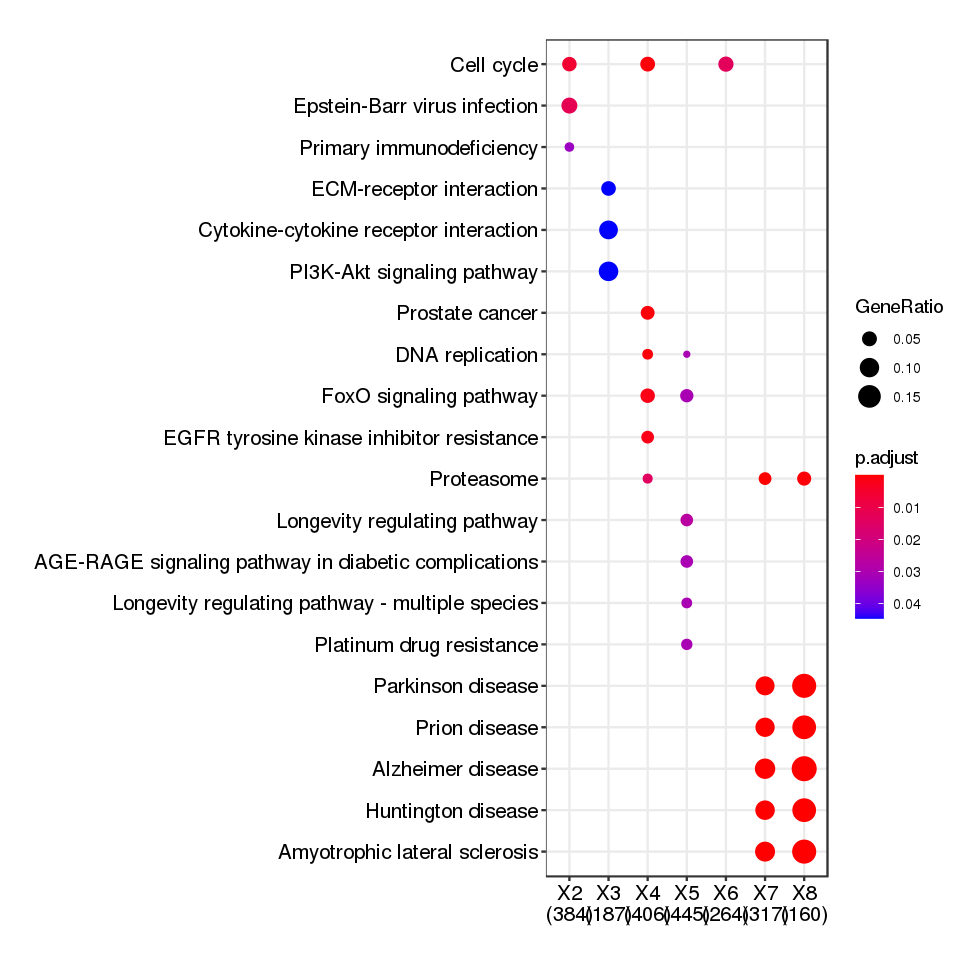

In [37]:
options(repr.plot.width=8, repr.plot.height=8)

dotplot(ck,showCategory = 5)
#dotplot(formula_res)

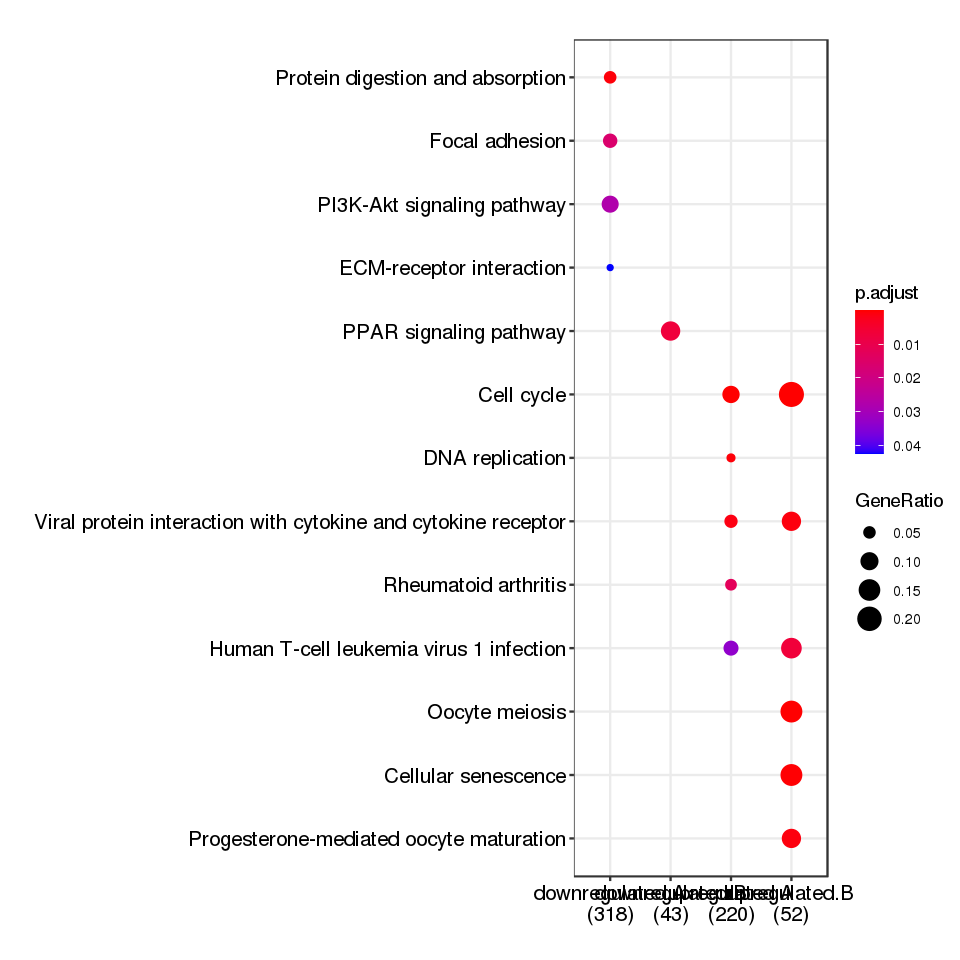

In [38]:
options(repr.plot.width=8, repr.plot.height=8)
dotplot(formula_res)

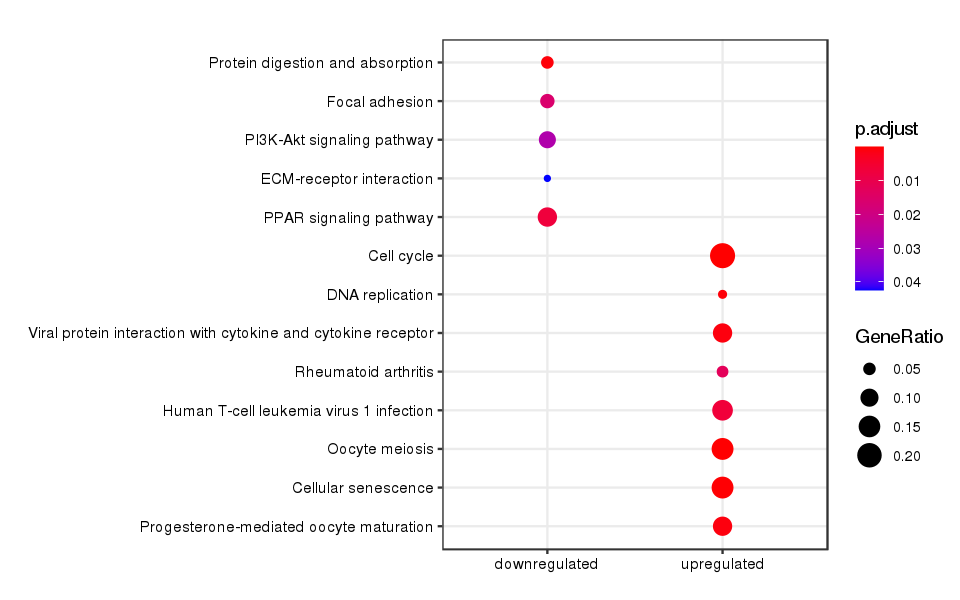

In [39]:
options(repr.plot.width=8, repr.plot.height=5)
dotplot(formula_res, x=~group, font.size=9) #+ ggplot2::facet_grid(~othergroup)

In [40]:
#?dotplot 